# Single Span Logistic-Non Linear Model

In [52]:
# importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [53]:
# function to calculate RMSE
def rmse(true,pred):
    rmse = sqrt(mean_squared_error(true, pred))
    return rmse
# function for normalising datasets using MinMaxScaler method

def minmaxscaler(train_X):    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    train_X = scaler.fit_transform(train_X)
    
    return train_X

# Function to calculate MAPE 
def mape(test_y, pred):
    #for i in range(pred.shape[0]):
    a = abs(test_y - pred)/test_y
    mape = sum(a)*100/len(a)
    return mape 

# function for plotting predicted AR values against actual AR values
def lineplot(true, pred,n):   
    x = np.linspace(0,max(true),10)
    y = x
    plt.plot( true[0:n], pred[0:n],'.', color='red' )
    plt.plot(x,y, color = 'black')
    plt.xlabel('Acutal AR')
    plt.ylabel('Predicted AR')
    plt.legend(["Prediction", "True Value"])
    plt.axis('scaled')

In [54]:
def model_performance(model, train_X,train_y,test_X,test_y):    
    # Predicting AR on a training data set and RMSE, MAPE calculation
    pred_model = model.predict(train_X)
    mape_train_model = mape(train_y,pred_model)
    rmse_train_model = rmse(train_y,pred_model)

    # Predicting AR on a test data set and RMSE, MAPE calculation
    pred_test_model = model.predict(test_X)
    mape_test_model = mape(test_y,pred_test_model)
    rmse_test_model = rmse(test_y,pred_test_model)

    print(' Model \n\nTraining score:',model.score(train_X,train_y),
          '\nRMSE:',rmse_train_model,
          '\nMAPE:',mape_train_model,
          
          '\n\nTest score:',model.score(test_X,test_y),
          '\nRMSE:',rmse_test_model,
          '\nMAPE:',mape_test_model,
          
         )
    print('\nTest set Graph Plot')
    lineplot(test_y,pred_test_model,100)

## 1. Loading Dataset

In [55]:
# loading datset of single span reinforced concrete beam design cases
df_original = pd.read_csv(r'ds_singlespan.csv',index_col=0)

In [56]:
#Shuffling Dataset
df_original = df_original.sample(frac=1)
df_original = df_original.reset_index(drop=True)

In [57]:
#Selecting only Design Cases ( removing Non linearity)
#df = df_original.loc[df_original['AR']!=0]
df=df_original
df['AR']=round(df['AR'])

In [58]:
#Adding Design column
df['Design'] = np.where(df.AR>0,1,0)

In [59]:
df

,Gk,Qk,L,B,H,AR,Design
0,5.641078,6.454159,3525.49,310.44,459.03,212.0,1
1,6.495088,5.690580,7612.63,192.94,589.41,580.0,1
2,7.060431,7.120284,4968.20,189.02,394.20,446.0,1
3,7.390272,8.933311,4149.16,188.92,385.71,369.0,1
4,5.578612,6.119236,3913.15,182.62,575.11,162.0,1
...,...,...,...,...,...,...,...
18369,5.123966,9.544296,5374.92,197.00,308.47,0.0,0
18370,8.099798,5.990037,3646.97,463.67,553.77,384.0,1
18371,6.339134,7.238998,5867.47,316.71,367.91,670.0,1
18372,5.019220,5.482283,4226.50,246.45,479.83,180.0,1


In [60]:
#Pearson Correlation
corr = df.corr()
corr["AR"].sort_values(ascending=False)

AR        1.000000
Design    0.739387
B         0.409463
H         0.402850
L         0.138173
Qk        0.029180
Gk        0.026504
Name: AR, dtype: float64

## 2. Dataset Split

In [61]:
# Defining input and output features for Logistic Regression Model
train_log = df.drop(columns = ['AR','Design'])
target_log = df['Design']
Actual_AR = df['AR']

# Defining input and output features for Non Linear Regression Model
df1 = df_original.loc[df_original['AR']!=0]
train_nlr = df1.drop(columns = ['AR','Design'])
target_nlr = df1['AR']

In [62]:
from sklearn.model_selection import train_test_split

n=2000 #(dataset used for training and validation)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(train_log[0:n], target_log[0:n], test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(train_nlr[0:n], target_nlr[0:n], test_size=0.2, random_state=42)


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

## 3. Logistic Regression Model

In [64]:
log_model = Pipeline([('minmax',StandardScaler()),
                         ('poly', PolynomialFeatures(degree=2)),
                        ('log',LogisticRegression(C=0.5,solver='saga'))])

log_model.fit(X_train_log, y_train_log)

C:\Users\fakem\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('minmax',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('log',
                 LogisticRegression(C=0.5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

 Model 

Training score: 0.9875 
RMSE: 0.11180339887498948 
MAPE: nan 

Test score: 0.9925 
RMSE: 0.08660254037844387 
MAPE: nan

Test set Graph Plot


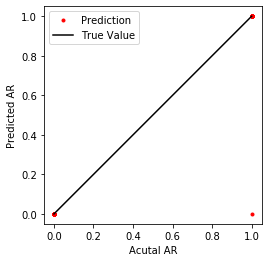

In [65]:
model_performance(log_model,X_train_log,y_train_log,X_test_log,y_test_log)

In [66]:
pred_log = log_model.predict(X_test_log)
print("Log Loss of Model : {} \nConfusion Matrix : \n{}".format(log_loss(pred_log,y_test_log),
                                                                confusion_matrix(pred_log,y_test_log)))

Log Loss of Model : 0.25904482094898207 
Confusion Matrix : 
[[ 96   2]
 [  1 301]]


In [67]:
log_model.named_steps['log'].coef_

array([[ 1.26788108, -0.68901206, -0.52216982, -2.98159411,  2.69831512,
         3.04736621, -0.05561373,  0.04795527, -0.53426175,  0.17250604,
         0.16425326,  0.11301492, -0.44976387, -0.00498719,  0.26812873,
        -0.32840171,  1.19415414,  1.74093301, -0.48808651, -0.90860643,
        -1.38613374]])

In [68]:
log_model.named_steps['log'].intercept_

array([5.07106721])

## 4. Regression Model

### 4.1 Linear Regression

In [80]:
#Defining and Fitting Linear Regression model
lr_model = Pipeline([('Std',StandardScaler()),
                        ('lr',LinearRegression())])
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

 Model 

Training score: 0.8661348330544385 
RMSE: 82.78041148745001 
MAPE: 15.267170592439095 

Test score: 0.8738291553012099 
RMSE: 84.84134624356551 
MAPE: 15.304980702316465

Test set Graph Plot


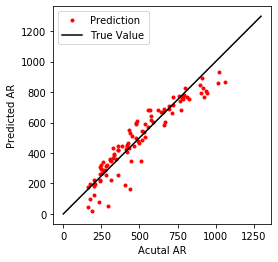

In [81]:
model_performance(lr_model,X_train,y_train,X_test,y_test)

### 4.2 Non Linear Regression Model

In [82]:
nlr_model = Pipeline( [ ('scalar', StandardScaler()),
                        ('poly', PolynomialFeatures(degree=3)),
                        ('model', Ridge(alpha=3, fit_intercept=True))
                       ])

nlr_model.fit(X_train, y_train)     

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

 Model 

Training score: 0.9959616398370791 
RMSE: 14.377928296807246 
MAPE: 2.7700976428354935 

Test score: 0.9960728037879012 
RMSE: 14.968192023037071 
MAPE: 2.797532920720135

Test set Graph Plot


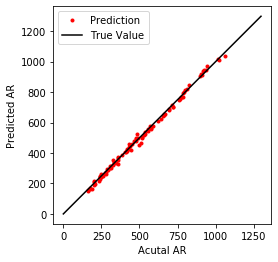

In [83]:
model_performance(nlr_model,X_train,y_train,X_test,y_test)

In [84]:
#coefficents
nlr_model.named_steps['model'].coef_

array([ 0.00000000e+00,  3.78850953e+01,  3.88085059e+01,  2.27967237e+02,
        1.77704602e+00, -8.11818799e+01,  7.30880673e-01,  1.27303116e+00,
        2.50892663e+01, -1.96359819e+00, -1.15795036e+01,  5.14114325e-01,
        2.84220157e+01, -2.92475563e+00, -1.38276123e+01,  4.76282562e+01,
       -1.90682986e+01, -6.82378234e+01,  4.23423236e+00,  1.04642263e+01,
        2.51541399e+01,  6.68016029e-01, -2.45278058e-01, -3.29545585e-01,
        8.36781990e-01,  1.41522213e-01,  4.65693587e-01, -4.27536135e-01,
        1.30120486e+00,  4.52162895e-01,  6.57569985e-01,  2.37105179e+00,
       -2.69796347e+00, -5.10261256e-01, -2.48563205e+00,  1.19106921e+00,
        8.91580096e-01,  9.56142659e-01, -2.69349842e-01, -8.44314991e-01,
        2.38039286e+00,  6.09952622e-01, -3.84292893e+00,  1.40195033e+00,
       -1.36270122e+00,  1.59821661e+00, -5.99109168e+00,  1.01923056e+01,
        4.65502946e+00, -2.40766305e+00, -1.24399438e+01,  5.99245972e+00,
        3.19450221e-01,  

In [85]:
nlr_model.named_steps['model'].intercept_

422.61073699973736

## 5. Test on untrained data

### Creating Test Set

In [86]:
m =100 #number of entries to test on
input_X = train_log[n:n+m]
input_X

,Gk,Qk,L,B,H
2000,7.652796,9.928252,5642.83,196.90,342.51
2001,9.873624,8.576106,7621.72,332.79,340.96
2002,8.223168,9.581039,6660.68,410.34,454.51
2003,7.443615,8.914583,4604.44,336.25,491.36
2004,6.835454,7.866789,4490.75,267.96,307.89
...,...,...,...,...,...
2095,8.384749,9.730140,5295.24,482.68,535.32
2096,5.908227,5.352417,6961.21,168.74,464.49
2097,6.573851,7.943249,7311.15,174.46,346.57
2098,7.967310,7.884354,6396.27,355.53,370.49


### Model Predictions

In [87]:
design_pred = log_model.predict(input_X)

In [88]:
pred_nlr, pred_lr = [],[]
for i in range(0,m):
    if design_pred[i]==1:
        pred_nlr.append(nlr_model.predict(input_X[i:i+1])[0])
        pred_lr.append(lr_model.predict(input_X[i:i+1])[0])
    else: 
        pred_nlr.append(0)
        pred_lr.append(0)

<b>Results<b>

In [89]:
result = pd.DataFrame()
result['True Value'] = Actual_AR[n:n+m]
result['Non LR Prediction'] = pred_nlr
result['LR Prediction'] = pred_lr
result = round(result)
result.head(20)

,True Value,Non LR Prediction,LR Prediction
2000,0.0,0.0,0.0
2001,0.0,0.0,0.0
2002,857.0,867.0,809.0
2003,337.0,346.0,418.0
2004,530.0,517.0,491.0
2005,0.0,0.0,0.0
2006,462.0,503.0,596.0
2007,0.0,0.0,0.0
2008,572.0,568.0,565.0
2009,0.0,0.0,0.0
